In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification as mc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
X, y = mc(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
#to generate a synthetic dataset for binary classification;

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0
 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1
 1 1 0 1]


Confusion Matrix:
 [[133  15]
 [ 23 129]]

Confusion Matrix:
 [[133  15]
 [ 23 129]] ABCDEFGH

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       148
           1       0.90      0.85      0.87       152

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



<Axes: >

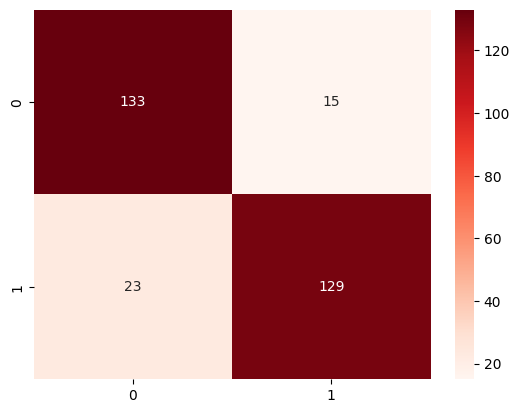

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"\nConfusion Matrix:\n {conf_matrix} ABCDEFGH")
print("\nClassification Report:\n", class_report)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=True)

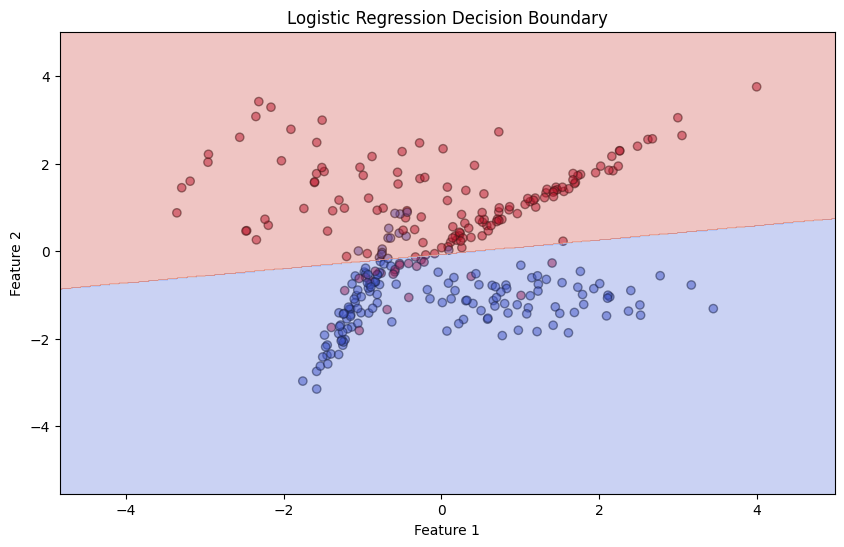

In [17]:
plt.figure(figsize=(10,6))
colors = {'X_test': 'magenta', 'y_test': 'cyan'}

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.5)

# Create a meshgrid for plotting the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()